In [ ]:
#WCSS: within-cluster sum of squares
#      distance between points in a cluster
#The elboe method is used to decide what number of clusters we should use
#plot WCSS against number of clusters and find the elbow on the plot

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
countries = pd.read_csv('Countries.csv')
countries

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


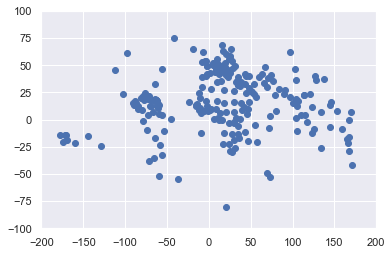

In [9]:
plt.scatter(countries['Longitude'], countries['Latitude'])
plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.show()

In [7]:
x = countries.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [10]:
wcss = []
cluster_num = 11
for i in range(1, cluster_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 192212.48189497035,
 151410.08098853033,
 126799.1009390775,
 102913.99944185292,
 84927.05022223278,
 77403.54203230856]

Text(0, 0.5, 'WCSS')

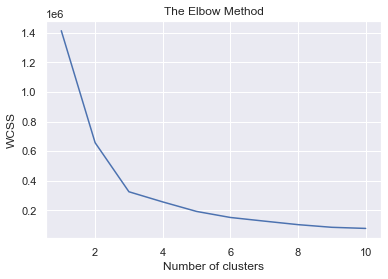

In [12]:
plt.plot(range(1, cluster_num), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [13]:
#so we can try 2 or 3

In [14]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [16]:
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = countries.copy()
data_with_clusters['Cluster'] = identified_clusters

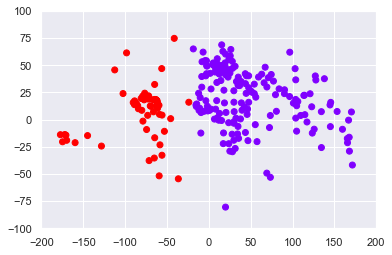

In [17]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.show()

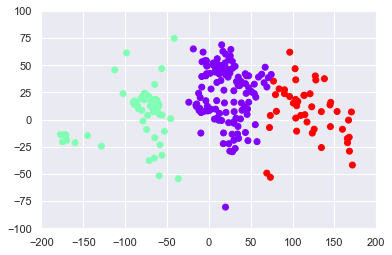

In [18]:
kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
data_with_clusters = countries.copy()
data_with_clusters['Cluster'] = identified_clusters

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.show()